In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set the dataset path (update if needed)
dataset_dir = '/content/drive/MyDrive/split_dataset'

# Check the classes (folder names)
classes = os.listdir(dataset_dir)
print("Classes found:", classes)

# Set image parameters
img_height, img_width = 224, 224
batch_size = 32


Classes found: ['Cracks', 'Corrosion', 'Paintings']


In [23]:
# Define image data generator with 20% validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

# Validation data generator
val_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 22 images belonging to 3 classes.
Found 4 images belonging to 3 classes.


In [24]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(len(classes), activation='softmax')  # Output layer with softmax
])

# Compile the model
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
epochs = 20

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.4091 - loss: 1.0952 - val_accuracy: 0.5000 - val_loss: 7.7384
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.5000 - loss: 9.0854 - val_accuracy: 0.5000 - val_loss: 10.9939
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4545 - loss: 10.1612 - val_accuracy: 0.2500 - val_loss: 5.1107
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step - accuracy: 0.4091 - loss: 6.8252 - val_accuracy: 0.2500 - val_loss: 4.4055
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step - accuracy: 0.3182 - loss: 7.3420 - val_accuracy: 0.2500 - val_loss: 2.9019
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.5455 - loss: 2.5147 - val_accuracy: 0.2500 - val_loss: 2.0582
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step - accuracy: 0.4091 - loss: 2.3548 - val_accuracy: 0.5000 - val_loss: 1.4006
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step - accuracy: 0.5455 - loss: 1.1841 - val_accuracy: 0.5000 - val_loss

In [5]:
model.save('/content/drive/MyDrive/damage.h5')

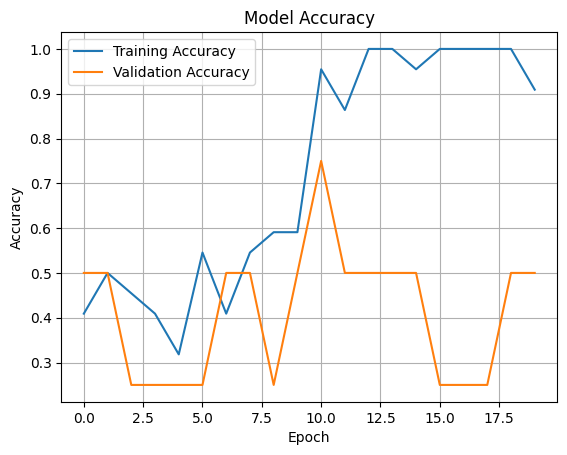

In [6]:
# Plot training vs validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
from google.colab import files
def predict_image(img_path):
    from tensorflow.keras.preprocessing import image
    import numpy as np

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale as during training

    # Predict using the model
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get class labels from train_generator
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    print(f"Predicted label: {predicted_label}")

# Upload an image
uploaded = files.upload()

# Predict each uploaded image
for filename in uploaded.keys():
    print(f"\nPredicting for: {filename}")
    predict_image(filename)


Saving IMG-20250510-WA0031.jpg to IMG-20250510-WA0031.jpg

Predicting for: IMG-20250510-WA0031.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Predicted label: Corrosion
